<a href="https://colab.research.google.com/github/yashsgiri/Data-Analytics-NPTEL/blob/main/practical_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
file_path = "/content/Customers.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Selecting relevant features
features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
data = df[features]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method to Determine Optimal K')

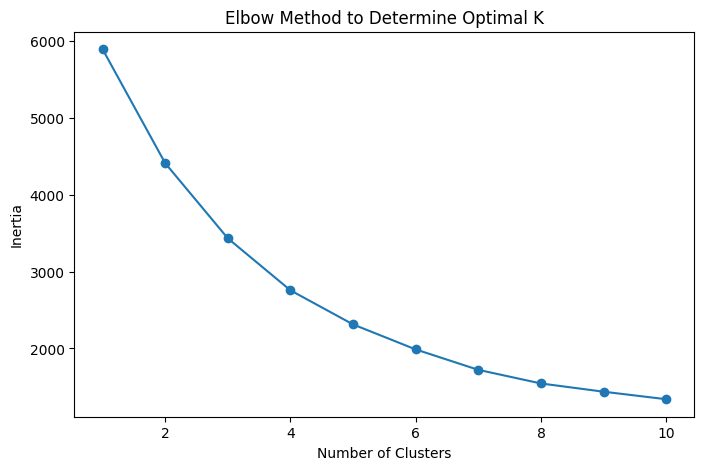

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')

In [ ]:
selected_k = [3, 4, 5]  # Adjust based on the dataset trend
for i in selected_k:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, labels)
    print(f"For k={i}, Silhouette Score: {silhouette_avg}")

For k=3, Silhouette Score: 0.25383102279696923
For k=4, Silhouette Score: 0.26533128432701114
For k=5, Silhouette Score: 0.27127188468307706


In [ ]:
def plot_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue=labels, palette='viridis')
    plt.title(f'K-Means Clustering with K={k}')
    plt.show()

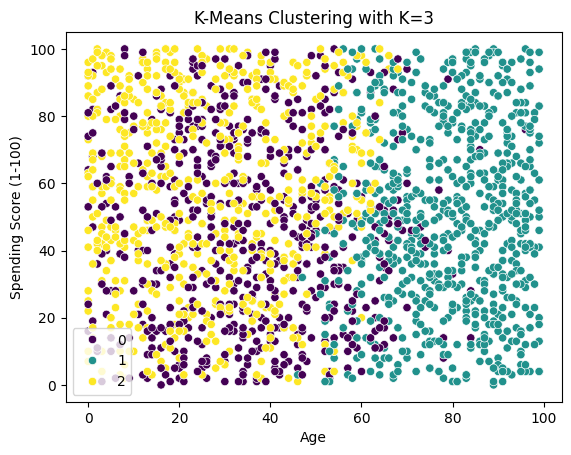

In [ ]:
plot_clusters(3)

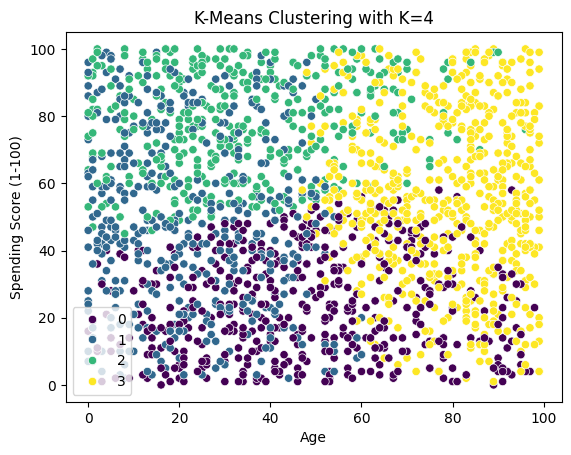

In [ ]:
plot_clusters(4)